In [1]:
import cogsworth
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import astropy.units as u

In [2]:
# this all just makes plots look nice
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.9 * fs,
          'ytick.labelsize': 0.9 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)
pd.options.display.max_columns = 999

In [26]:
p = cogsworth.pop.Population(10000, final_kstar1=[13, 14], use_default_BSE_settings=True)
p.sample_initial_binaries()
p.perform_stellar_evolution()

In [30]:
had_mt = p.bpp[p.bpp["evol_type"] == 3]["bin_num"].unique()
had_ce = p.bpp[p.bpp["evol_type"] == 7]["bin_num"].unique()
had_sn1 = p.bpp[p.bpp["evol_type"] == 15]["bin_num"].unique()
had_sn2 = p.bpp[p.bpp["evol_type"] == 16]["bin_num"].unique()
disrupted = p.bin_nums[p.disrupted]

In [32]:
# find all the binaries that have experienced all of these events
uni, count = np.unique(np.concatenate([had_mt, had_ce, had_sn1,
                                       had_sn2, disrupted]),
                       return_counts=True)
cool_binaries = uni[count == 5]
complicated_binary = np.random.choice(cool_binaries)

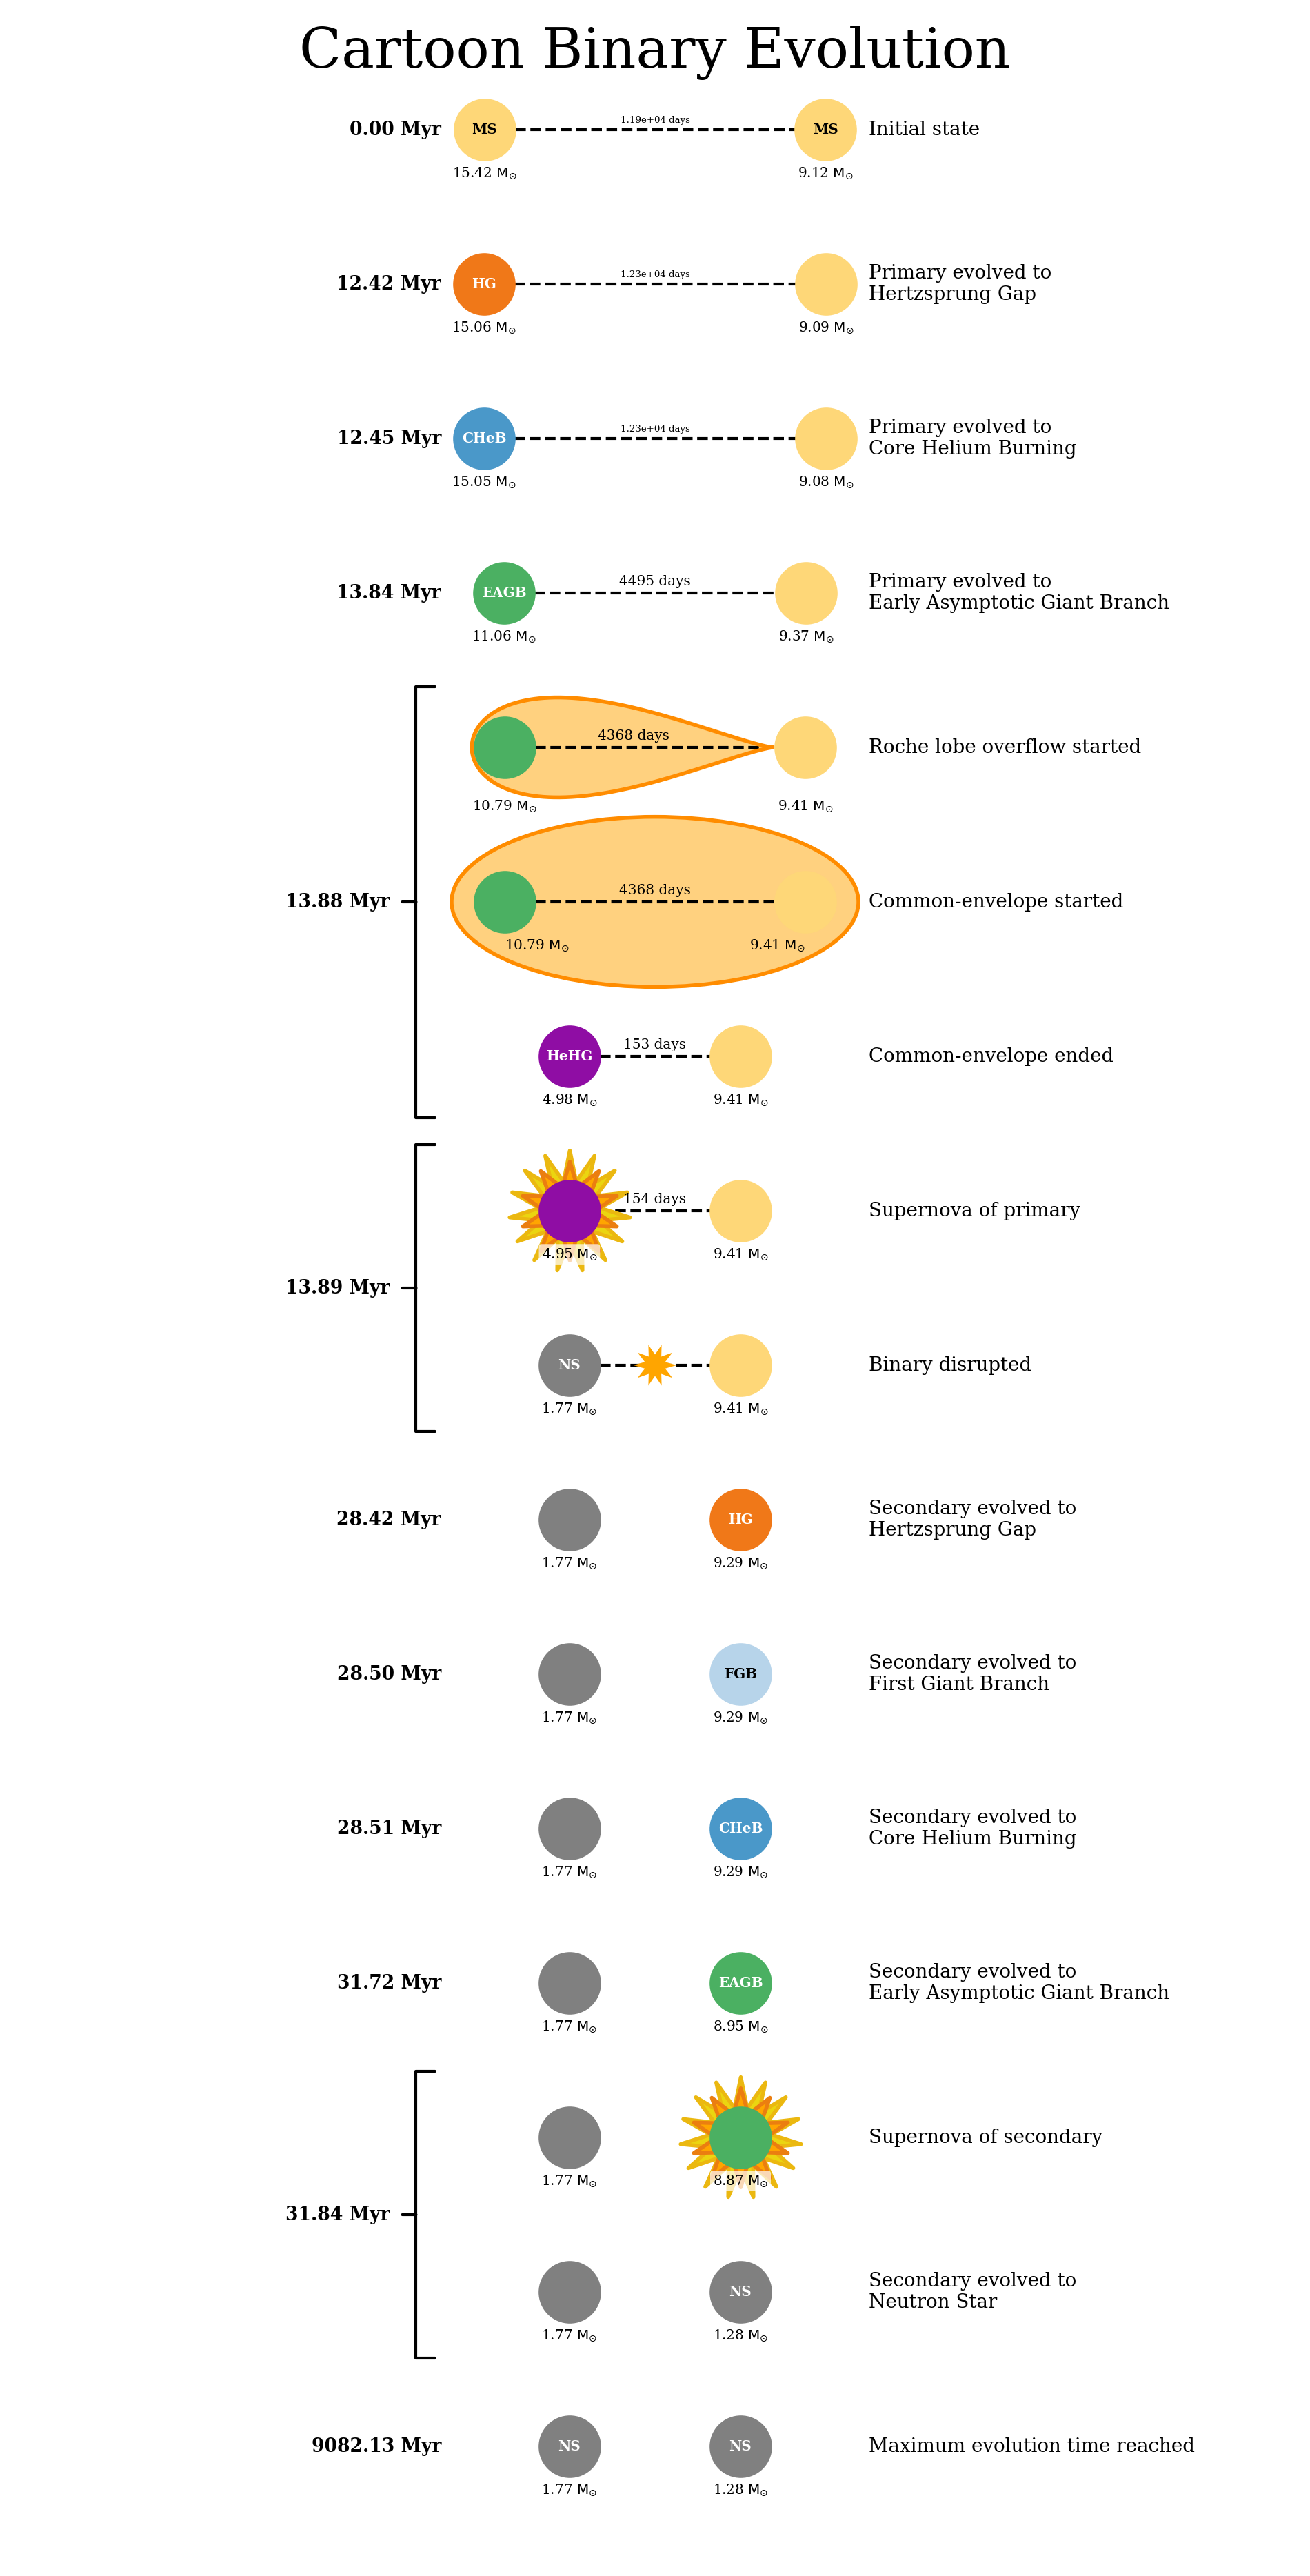

In [34]:
p.plot_cartoon_binary(complicated_binary);

In [35]:
# reduce the population to just the complicated binary
p = p[int(complicated_binary)]

# get the bcm table to contain every timestep
p.bcm_timestep_conditions = [["binstate=0", "dtp=0.0"]]

# re-perform evolution
p.perform_stellar_evolution()

Now ``p.bcm`` contains all of timesteps for our complicated binary and we can use the ``COSMIC`` plotting routine to investigate it.

In [36]:
# import the plotting routine from COSMIC
from cosmic.plotting import plot_binary_evol

# reset plotting style to avoid fontsize issues
plt.style.use("default")

In this case I trim it to only include timesteps within the first 1000 Myr, but you could also apply a lower limit to zoom in on more detail.

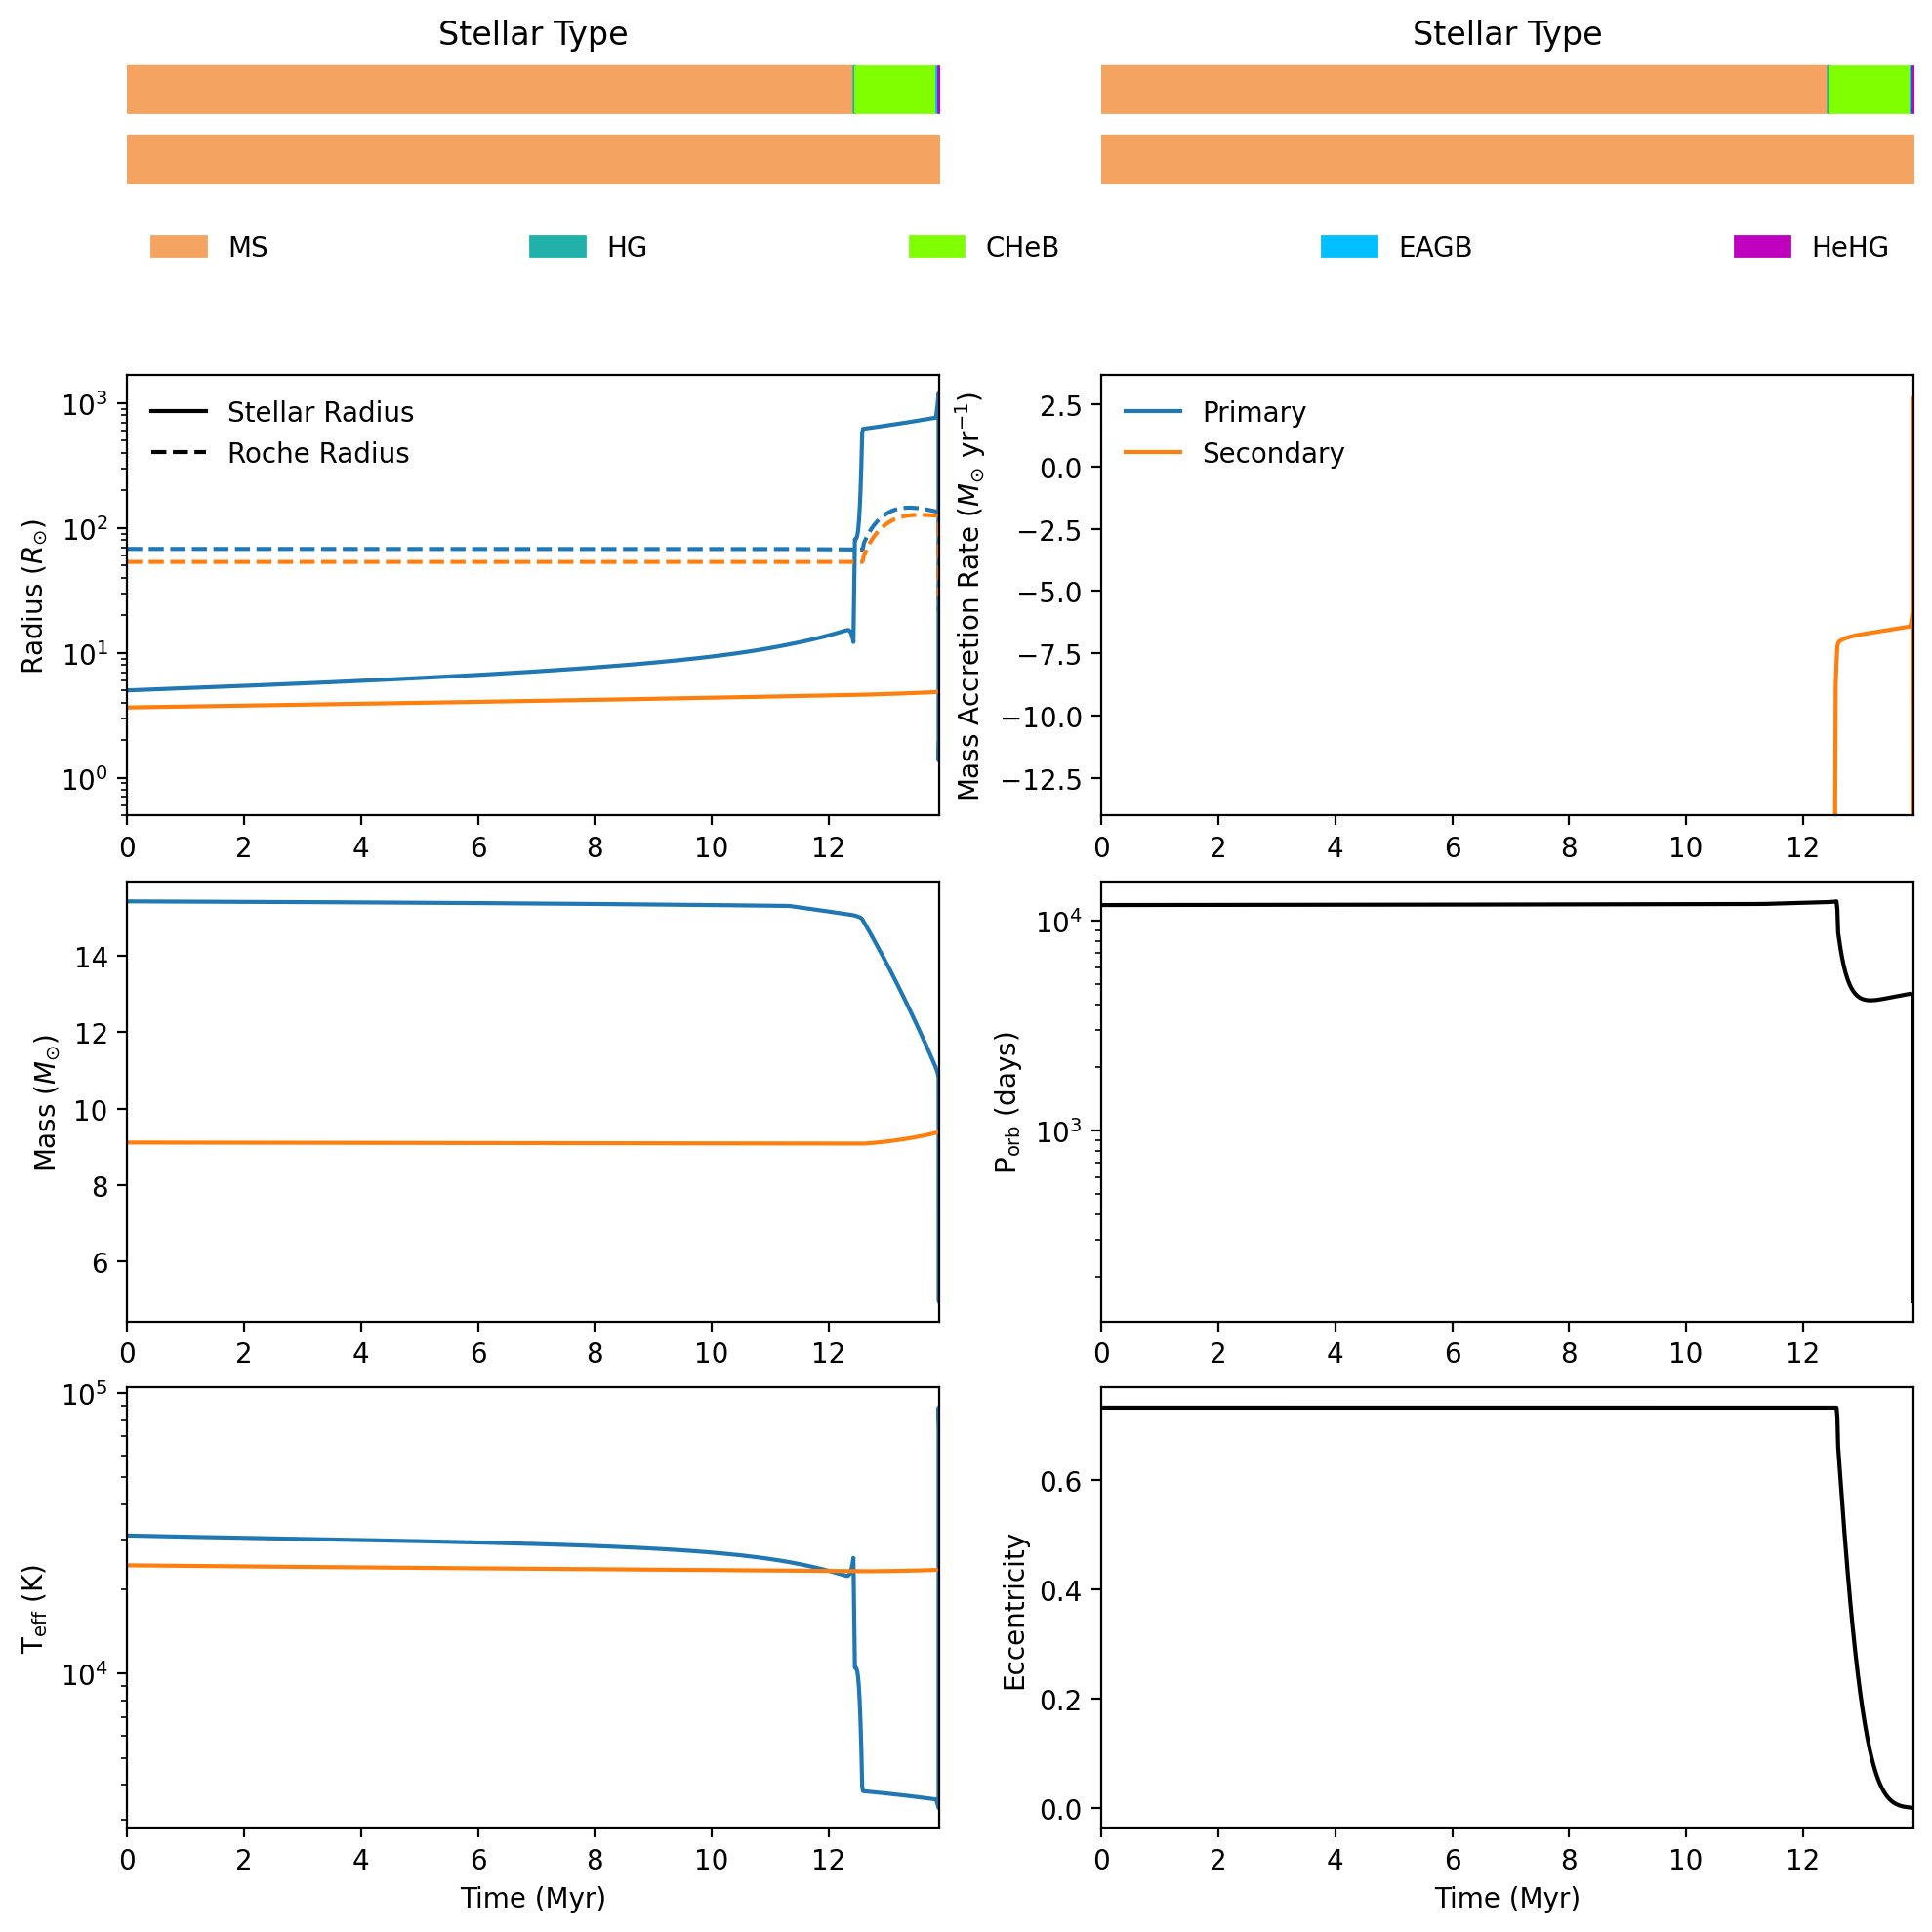

In [37]:
plot_binary_evol(p.bcm[p.bcm["tphys"] < 1000])
plt.show()